# Assignment No. 02

# Title of the Assignment: Classification using Deep Neural Network

## Objective:
- Implement binary classification using a Deep Neural Network (DNN).
- Use the IMDB movie reviews dataset to classify text reviews as **positive** or **negative**.
- Understand the basics of **Natural Language Processing (NLP)** and how DNNs can be applied to textual data.


In [1]:
# Step 1: Ignore Warnings and Import Libraries
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
# Step 2: Load IMDB Dataset
# Only keep the top 10,000 most frequent words
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print(f"Training samples: {len(x_train)}, Test samples: {len(x_test)}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Training samples: 25000, Test samples: 25000


In [3]:
# Step 3: Preprocess Data - Pad Sequences
max_length = 200
x_train_padded = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test_padded = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

print(f"Padded x_train shape: {x_train_padded.shape}")


Padded x_train shape: (25000, 200)


In [4]:
# Step 4: Build the Deep Neural Network Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Step 5: Train the Model
history = model.fit(
    x_train_padded, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6563 - loss: 0.6101 - val_accuracy: 0.8460 - val_loss: 0.3678
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8740 - loss: 0.3027 - val_accuracy: 0.8654 - val_loss: 0.3215
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9048 - loss: 0.2357 - val_accuracy: 0.8490 - val_loss: 0.3592
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9192 - loss: 0.2020 - val_accuracy: 0.8728 - val_loss: 0.3264
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9340 - loss: 0.1743 - val_accuracy: 0.8318 - val_loss: 0.4415
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9432 - loss: 0.1557 - val_accuracy: 0.8674 - val_loss: 0.3671
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9597 - loss: 0.1217 - val_accuracy: 0.8662 - val_loss: 0.3854
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9599 - loss: 0.1181 - val_accuracy: 0

In [6]:
# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(x_test_padded, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8236 - loss: 0.5905

Test Accuracy: 0.8234


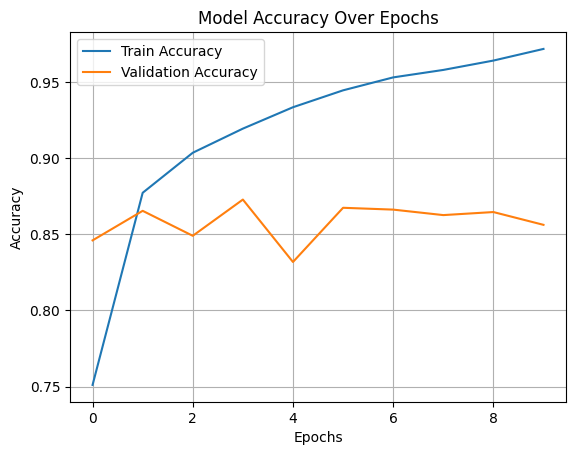

In [7]:
# Step 7: Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Step 8: Predict on Sample Review
# Let's decode the review to see what it says
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

sample_review = x_test[0]
print("Review Text:\n", decode_review(sample_review))
print("Actual Sentiment:", "Positive" if y_test[0] == 1 else "Negative")

# Predict sentiment
sample_review_padded = pad_sequences([sample_review], maxlen=max_length, padding='post', truncating='post')
prediction = model.predict(sample_review_padded)[0][0]
print(f"Predicted Sentiment Score: {prediction:.4f}")
print("Predicted Sentiment:", "Positive" if prediction >= 0.5 else "Negative")


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Review Text:
 ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
Actual Sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Predicted Sentiment Score: 0.0471
Predicted Sentiment: Negative


In [9]:
# Step 6.1: Display Accuracy as Percentage
print(f"Model Test Accuracy: {accuracy * 100:.2f}%")

Model Test Accuracy: 82.34%


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.89      0.83     12500
    Positive       0.88      0.75      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.83      0.82      0.82     25000
weighted avg       0.83      0.82      0.82     25000



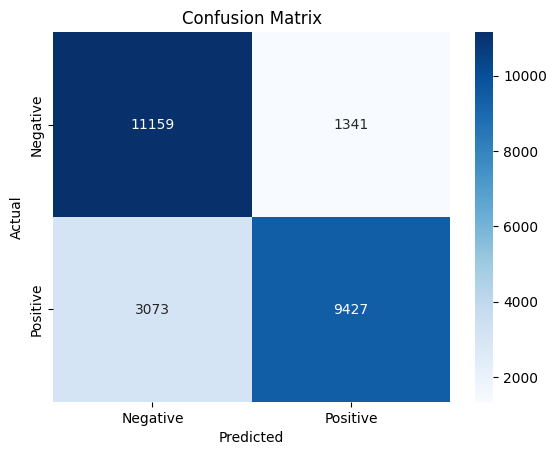

In [10]:
# Optional: Detailed Accuracy Report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on test set
y_pred_probs = model.predict(x_test_padded)
y_pred = (y_pred_probs >= 0.5).astype(int).reshape(-1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()